# The perceptron

    
Learning goals:
1. Implement a perceptron. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### Exercise 1: The activation function (1 point)
The perceptron uses the *linear threshold activation* function $g(\mathbf{x})$ with $\theta=0$. Write a function ```linear_threshold(x, theta)``` that computes this activation given any input $x$.

### Solution 1

In [2]:
# The activation function
def linear_threshold(x, theta):
    return np.where(x<theta, 0, 1)

### Exercise 2: Perceptron output (1 point)
The output $y$ of a perceptron is given by $y=g(\mathbf{w}^\top \mathbf{x})$, with input vector $\mathbf{x}$, the weight vector $\mathbf{w}$, and the activation function $g$. Write a function ```compute_output(x,w)``` that computes the output of a perceptron, given a single pattern $\mathbf{x}$ and the current perceptron weights $\mathbf{w}$.

### Solution 2

In [3]:
# Output of a perceptron
def compute_output(x, w):
    return linear_threshold(np.dot(w.transpose(), x), 0)

### Exercise 3: Weight update (1 point)
A perceptron is trained (i.e. it learns the right weights) following the perceptron convergence procedure. Write a function ```update_weights(w, x, y, t)``` that performs this procedure. Specifically, write a function that returns the updated perceptron weights following the rule from the lecture, given one input pattern $\mathbf{x}$, its target output $\mathbf{t}$, the current set of weights $\mathbf{w}$ and the (already calculated) output of the perceptron $\mathbf{y}$. 

You don't need to calculate the perceptron output $\mathbf{y}$ here, it will be calculated in the final perceptron training function with your ```compute_output()``` function. 

Hint: This is a very short function again. 

### Solution 3

In [4]:
# Perceptron weight update
def update_weights(w, x, y, t):
    return w + (t - y) * x

### Exercise 4: Training (1.5 points)
You now have implemented all the building blocks for a perceptron. Now, write a function ```perceptron_train(X, T, n_epochs)``` that trains and returns weights $\mathbf{w}$ for a perceptron, given a dataset $\mathbf{X}$ and targets $\mathbf{T}$.

`n` is the number of training examples. `m` is the number of weights. Expect $\mathbf{X}$ to be a matrix containing the training examples with dimensions `(m,n)` and $\mathbf{T}$ containing the targets for each example, a vector with length `n`.

It should train for 10 epochs (iterations over all training examples). Make use of `np.random.permutation` to avoid that you are always iterating over the examples in the same order. 

For now only implement ```perceptron_train(X, T, n_epochs)```. We will call and test it later. 

### Solution 4

In [5]:
def perceptron_train(X, T, n_epochs=10):
    m, n = X.shape

    # Initialize the right number of weights as zeros
    right_weights = np.zeros(m)

    # Loop over epochs
    for i in range(n_epochs):

        # Loop over all examples in random order
        for idx in np.random.permutation(n):

            # Take an example
            temp_X = X[: ,idx]

            # Compute the output of the perceptron
            y = compute_output(temp_X, right_weights)

            # Update the weights of the perceptron
            right_weights = update_weights(right_weights, temp_X, y, T[idx])

    return right_weights

### Exercise 5: Testing (1.5 points)
In addition to the training function, write a function `perceptron_test(X,w)` that computes and returns the outputs $\mathbf{Y}$ for a given dataset $\mathbf{X}$ and a perceptron given by its weights $\mathbf{w}$. 

### Solution 5

In [6]:
def perceptron_test(X, w):
    n = X.shape[1]
    
    # Create an output array Y that you use to store the perceptron outputs
    Y = np.zeros([n,])

    # Loop over the examples
    for i in range(n):
    
        # Take an example
        example = X[: ,i]
   
        # Compute the output of the perceptron
        Y[i] = compute_output(example, w)   
    
    return Y

### Exercise 6: OR (1 point)
Use your functions to train and test a perceptron on the OR problem, given by input patterns $\mathbf{X}$ and targets $\mathbf{T}$. 

Print your trained perceptron's outputs $\mathbf{Y}$ and the expected outputs $\mathbf{T}$ for the OR problem  to check whether your perceptron has learned successfully. 

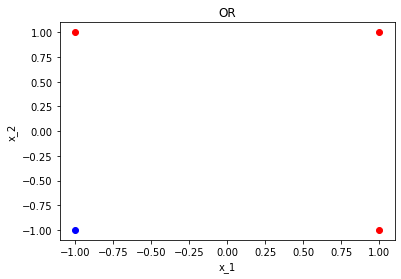

In [7]:
# Inputs
X = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]], dtype="float32").T

# Targets
T = np.array([0, 1, 1, 1], dtype="float32")

# Plot data
plt.figure()
for i in range(X.shape[1]):
    if T[i] == 1:
        plt.plot(X[0, i], X[1, i], "or")
    else:
        plt.plot(X[0, i], X[1, i], "ob")
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.title("OR")

# Add bias terms
X = np.vstack((np.ones((1, X.shape[1])), X))

### Solution 6

In [8]:
# Train the perceptron
w = perceptron_train(X, T, n_epochs=10)

# Apply the perceptron
y = perceptron_test(X,w)

# Print predictions and targets
print('targets:', T)
print('predictions:', y)

targets: [0. 1. 1. 1.]
predictions: [0. 1. 1. 1.]


### Exercise 7: AND (1 point)
Train and test your perceptron on the AND problem, given by input patterns $\mathbf{X}$ and targets $\mathbf{T}$. 

Print your trained perceptron's outputs $\mathbf{Y}$ and the expected outputs for the AND problem $\mathbf{T}$ to check whether your perceptron has learned successfully. 

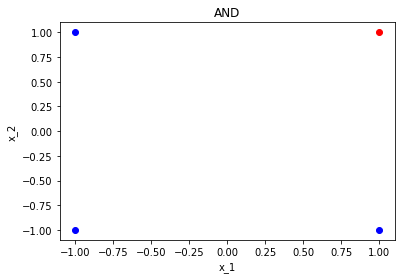

In [9]:
# Inputs
X = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]], dtype="float32").T

# Targets
T = np.array([0, 0, 0, 1], dtype="float32")

# Plot data
plt.figure()
for i in range(X.shape[1]):
    if T[i] == 1:
        plt.plot(X[0, i], X[1, i], "or")
    else:
        plt.plot(X[0, i], X[1, i], "ob")
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.title("AND")

# Add bias terms
X = np.vstack((np.ones((1, X.shape[1])), X))

### Solution 7

In [10]:
# Train the perceptron
w = perceptron_train(X, T, n_epochs=10)

# Apply the perceptron
y = perceptron_test(X,w)

# Print predictions and targets
print('target:', T)
print('predictions:', y)

target: [0. 0. 0. 1.]
predictions: [0. 0. 0. 1.]


### Exercise 8: XOR (1 point)
Train and test your perceptron on the XOR problem, given by input patterns $\mathbf{X}$ and targets $\mathbf{T}$. 

Print your trained perceptron's outputs $\mathbf{Y}$ and the expected outputs for the XOR problem $\mathbf{T}$ to check whether your perceptron has learned successfully. 

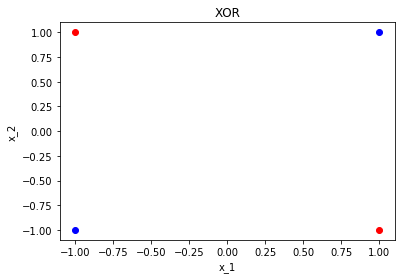

In [11]:
# Inputs
X = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]], dtype="float32").T

# Targets
T = np.array([0, 1, 1, 0], dtype="float32")

# Plot data
plt.figure()
for i in range(X.shape[1]):
    if T[i] == 1:
        plt.plot(X[0, i], X[1, i], "or")
    else:
        plt.plot(X[0, i], X[1, i], "ob")
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.title("XOR")

# Add bias terms
X = np.vstack((np.ones((1, X.shape[1])), X))

### Solution 8

In [16]:
# Train the perceptron
w = perceptron_train(X, T, n_epochs=10)

# Apply the perceptron
y = perceptron_test(X,w)

# Print predictions and targets
print('target:', T)
print('predictions:', y)

target: [0. 1. 1. 0.]
predictions: [1. 1. 1. 1.]


### Exercise 9: Interpretation (1 point)

1. Which of the three problems OR, AND and XOR did the perceptron learn, and which did it not learn?
1. Which property do the patterns in $\mathbf{X}$ need to have so that the perceptron can learn them? 
1. Which of the three problems do or do not have this property?

### Solution 9

1. OR and AND did ther perceptron learn, but XOR did not.
2. Two types of values (0 and 1) can be separated by one straight line. (Linear Separability)
3. For OR and AND operations, they satisfy this property. In the case of the XOR operation, it is not possible to separate 0 and 1 with only one straight line. Therefore, it is needed to use nonlinear curves.